<a href="https://colab.research.google.com/github/abhishek2602/Advanced-Machine-Learning/blob/master/LDA_Concept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Discriminant Analysis

## PCA & LDA on IRIS Data

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [0]:
# Loading the dataset
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

In [0]:
pca = PCA(n_components = 2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components = 2)
X_r2 = lda.fit(X, y).transform(X) #Since LDA is a supervised learning algorithm, the target column needs to be specified


In [5]:
# Percentage of variance explained for each components
print('Explained variance ration (first two components): %s' %str(pca.explained_variance_ratio_))

Explained variance ration (first two components): [0.92461872 0.05306648]


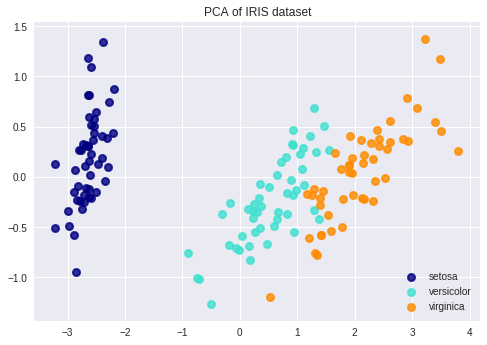

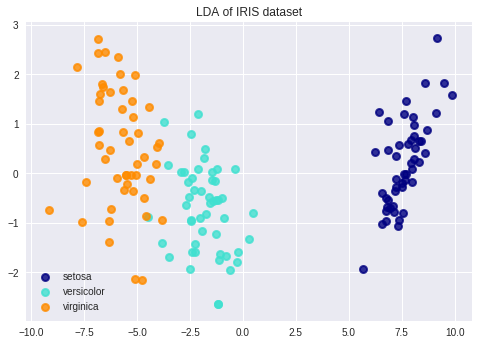

In [6]:
# Plotting the scatter plots based on PCA and LDA analysis on the IRIS dataset
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
  plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color = color, alpha = 0.8, lw = lw, label = target_name)
  
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
  plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], color = color, alpha = 0.8, lw = lw, label = target_name)
  
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('LDA of IRIS dataset')

plt.show()

## LDA on Wine Data

In [0]:
import pandas as pd

# Loading data from the UCI Machine Learning Repo
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header = None)

# Defining the Column names
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

In [8]:
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [9]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
# Splitting the data and Standardising
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

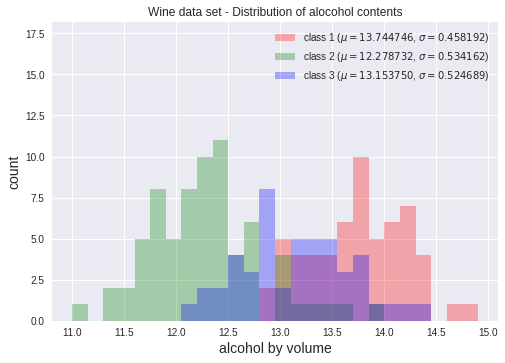

In [11]:
from math import floor, ceil

# the order of the colors for each histogram
colors = ('red', 'green', 'blue')

# bin width of the histogram in steps of 0.15
bins = np.arange(floor(min(X[:, 0])), ceil(max(X[:, 0])), 0.15)

# max count for a particular bin for all classed combined
max_bin = max(np.histogram(X[:, 0], bins = bins)[0])

for label, color in zip(range(1, 4), colors):
  mean = np.mean(X[:, 0][y == label]) # class sample mean
  stdev = np.std(X[:, 0][y == label]) # class standard deviation
  plt.hist(X[:, 0][y == label], bins = bins, alpha = 0.3, #opacity level
      label = 'class {} ($\mu = {:2f}$, $\sigma = {:2f}$)'.format(label, mean, stdev), color = color)

plt.ylim([0, max_bin*1.3])
plt.title('Wine data set - Distribution of alocohol contents')
plt.xlabel('alcohol by volume', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')

plt.show()

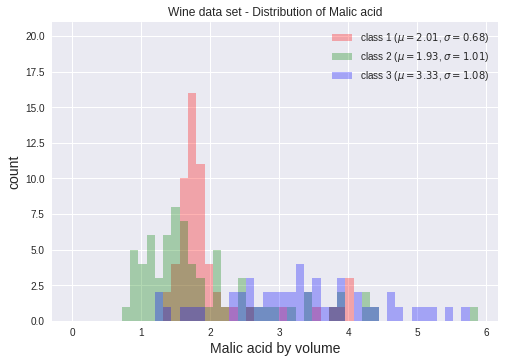

In [12]:
from math import floor, ceil 

# the order of the colors for each histogram
colors = ('red', 'green', 'blue')

# bin width of the histogram in steps of 0.12
bins = np.arange(floor(min(X[:,1])), ceil(max(X[:,1])), 0.12)

# max count for a particular bin for all classes combined
max_bin = max(np.histogram(X[:,1], bins=bins)[0])

for label,color in zip(range(1,4), colors):
    mean = np.mean(X[:,1][y == label]) # class sample mean
    stdev = np.std(X[:,1][y == label]) # class standard deviation
    plt.hist(X[:,1][y == label], bins=bins, alpha=0.3, # opacity level
             label='class {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev),
             color=color)

plt.ylim([0, max_bin])
plt.title('Wine data set - Distribution of Malic acid')
plt.xlabel('Malic acid by volume', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')

plt.show()

In [13]:
np.set_printoptions(precision=4)

mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 1: [ 0.939  -0.3671  0.3042 -0.7939  0.4489  0.8891  0.9656 -0.4912  0.558
  0.2169  0.4507  0.7705  1.1707]

MV 2: [-0.8597 -0.3294 -0.3959  0.298  -0.3083 -0.0496  0.0614 -0.0301  0.1509
 -0.867   0.4261  0.2809 -0.6949]

MV 3: [ 0.1596  0.9162  0.2243  0.4958 -0.0747 -0.9731 -1.2264  0.6222 -0.8784
  1.0198 -1.1568 -1.3195 -0.3554]



In [14]:
X_train_std

array([[ 0.6284,  1.0812, -0.6521, ..., -0.6414, -1.0709, -0.5182],
       [-0.5409, -0.613 , -1.4275, ...,  0.3465,  1.3308, -0.2151],
       [-0.7557, -1.287 , -1.5383, ...,  0.4324, -0.3984,  0.042 ],
       ...,
       [ 1.6904, -0.4855,  0.0494, ...,  1.0338,  0.5485,  2.6682],
       [-0.3261, -0.7952, -0.3937, ...,  0.0029, -0.7415, -0.7983],
       [-0.7437,  0.0428,  0.3448, ..., -0.6843,  1.07  , -0.9861]])

In [15]:
d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [16]:
print('Class label distribution: %s' % np.bincount(y_train)[1:])

Class label distribution: [40 50 34]


In [17]:
d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],
                                                     S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [18]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13  # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [19]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_vals.shape, eigen_vecs.shape

((13,), (13, 13))

In [20]:
eigen_vals

array([-2.8422e-14+0.0000e+00j,  1.6127e+02+0.0000e+00j,
        3.7293e+02+0.0000e+00j, -5.3414e-14+0.0000e+00j,
        2.1007e-14+0.0000e+00j, -2.0538e-14+0.0000e+00j,
        5.2793e-15+1.2096e-14j,  5.2793e-15-1.2096e-14j,
       -8.4198e-15+1.0998e-14j, -8.4198e-15-1.0998e-14j,
        1.0375e-15+3.5993e-15j,  1.0375e-15-3.5993e-15j,
       -4.1308e-16+0.0000e+00j])

In [21]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print (eigen_val[0])

Eigenvalues in decreasing order:

372.9269890059842
161.27085759687992
5.341362963496654e-14
2.842170943040401e-14
2.1006501003645297e-14
2.053779350617852e-14
1.3851245870763949e-14
1.3851245870763949e-14
1.3198204794001044e-14
1.3198204794001044e-14
3.74582246777781e-15
3.74582246777781e-15
4.1308280440197533e-16


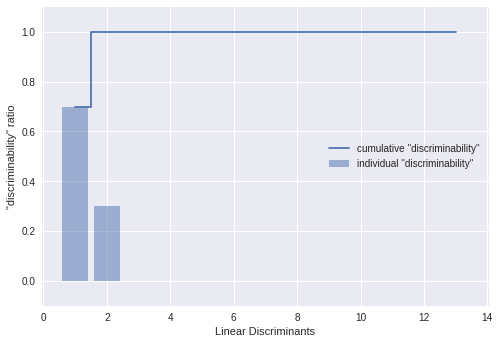

In [22]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, align='center', label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid', label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

In [23]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, 
               eigen_pairs[1][1][:, np.newaxis].real))
w

array([[ 0.1089, -0.4297],
       [-0.0698, -0.1402],
       [ 0.0446, -0.4425],
       [-0.2257,  0.3952],
       [-0.0079, -0.0154],
       [-0.1842, -0.0975],
       [ 0.724 ,  0.2255],
       [ 0.064 ,  0.0916],
       [-0.0259,  0.2006],
       [-0.3103, -0.2719],
       [ 0.0863,  0.2096],
       [ 0.3851,  0.0982],
       [ 0.3397, -0.4549]])

In [0]:
X_train_lda = X_train_std.dot(w)

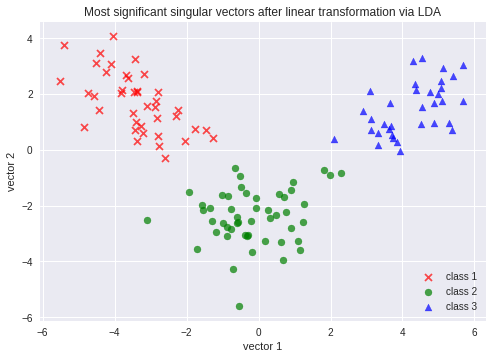

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sklearn_lda = LinearDiscriminantAnalysis(n_components=2)
transf_lda = sklearn_lda.fit_transform(X_train, y_train)

for label,marker,color in zip(range(1,4),('x', 'o', '^'),('red', 'green', 'blue')):
    plt.scatter(x=transf_lda[:,0][y_train == label],
                y=transf_lda[:,1][y_train == label],
                marker=marker, color=color,
                alpha=0.7, label='class {}'.format(label))

plt.xlabel('vector 1')
plt.ylabel('vector 2')

plt.legend(loc='lower right')
plt.title('Most significant singular vectors after linear transformation via LDA')

plt.show()

## Conclusion
### We see that using Linear Discriminant Analysis, we are able to clearly distinguish between three classes of wine.